In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
filter_size = 5
l2_reg = 0.001
batch_size = 64
optimizer = 'adam'

In [4]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_reg)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
model = create_model()
history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size,
                    validation_data=(x_test, y_test), verbose=2)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 - 63s - 67ms/step - accuracy: 0.8142 - loss: 0.6700 - val_accuracy: 0.8615 - val_loss: 0.5169
Epoch 2/5
938/938 - 58s - 62ms/step - accuracy: 0.8693 - loss: 0.4742 - val_accuracy: 0.8716 - val_loss: 0.4583
Epoch 3/5
938/938 - 84s - 90ms/step - accuracy: 0.8845 - loss: 0.4212 - val_accuracy: 0.8801 - val_loss: 0.4297
Epoch 4/5
938/938 - 79s - 85ms/step - accuracy: 0.8907 - loss: 0.3956 - val_accuracy: 0.8839 - val_loss: 0.4197
Epoch 5/5
938/938 - 84s - 89ms/step - accuracy: 0.8944 - loss: 0.3813 - val_accuracy: 0.8926 - val_loss: 0.3973

Test Accuracy: 0.8926, Test Loss: 0.3973


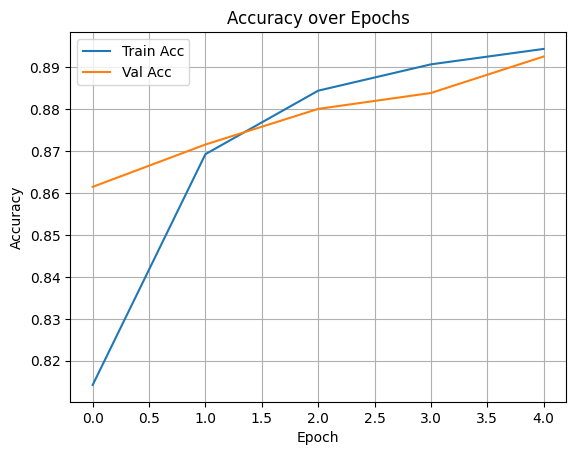

In [6]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
